In [82]:
import warnings 
warnings.simplefilter("ignore")
import pandas as pd
import numpy as np
dataset = pd.read_csv('garments_worker_productivity.csv')
dataset

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1192,3/11/2015,Quarter2,finishing,Wednesday,10,0.75,2.90,NaN,960,0,0.0,0,0,8.0,0.628333
1193,3/11/2015,Quarter2,finishing,Wednesday,8,0.70,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1194,3/11/2015,Quarter2,finishing,Wednesday,7,0.65,3.90,NaN,960,0,0.0,0,0,8.0,0.625625
1195,3/11/2015,Quarter2,finishing,Wednesday,9,0.75,2.90,NaN,1800,0,0.0,0,0,15.0,0.505889


In [83]:
###Understanding the dataset
dataset.shape

(1197, 15)

In [84]:
dataset.head()

,date,quarter,department,day,team,targeted_productivity,smv,wip,over_time,incentive,idle_time,idle_men,no_of_style_change,no_of_workers,actual_productivity
0,1/1/2015,Quarter1,sweing,Thursday,8,0.80,26.16,1108.0,7080,98,0.0,0,0,59.0,0.940725
1,1/1/2015,Quarter1,finishing,Thursday,1,0.75,3.94,NaN,960,0,0.0,0,0,8.0,0.886500
2,1/1/2015,Quarter1,sweing,Thursday,11,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
3,1/1/2015,Quarter1,sweing,Thursday,12,0.80,11.41,968.0,3660,50,0.0,0,0,30.5,0.800570
4,1/1/2015,Quarter1,sweing,Thursday,6,0.80,25.90,1170.0,1920,50,0.0,0,0,56.0,0.800382


In [85]:
##slicing the dataset
dataset=dataset.drop(['idle_time','idle_men','no_of_style_change','date','quarter','day','team','department',], axis=1)

In [86]:
dataset

,targeted_productivity,smv,wip,over_time,incentive,no_of_workers,actual_productivity
0,0.80,26.16,1108.0,7080,98,59.0,0.940725
1,0.75,3.94,NaN,960,0,8.0,0.886500
2,0.80,11.41,968.0,3660,50,30.5,0.800570
3,0.80,11.41,968.0,3660,50,30.5,0.800570
4,0.80,25.90,1170.0,1920,50,56.0,0.800382
...,...,...,...,...,...,...,...
1192,0.75,2.90,NaN,960,0,8.0,0.628333
1193,0.70,3.90,NaN,960,0,8.0,0.625625
1194,0.65,3.90,NaN,960,0,8.0,0.625625
1195,0.75,2.90,NaN,1800,0,15.0,0.505889


In [90]:
#Segregate and reshape the dataset
x = dataset.iloc[:,0]

In [91]:
x

0       0.80
1       0.75
2       0.80
3       0.80
4       0.80
        ... 
1192    0.75
1193    0.70
1194    0.65
1195    0.75
1196    0.70
Name: targeted_productivity, Length: 1197, dtype: float64

In [92]:
x.shape

(1197,)

In [93]:
x=dataset.iloc[:,0].values.reshape(-1,1)
x.shape

(1197, 1)

In [94]:
y=dataset.iloc[:,-1].values.reshape(-1,1)
y.shape

(1197, 1)

In [124]:
y

array([[0.94072542],
       [0.8865    ],
       [0.80057049],
       ...,
       [0.625625  ],
       [0.50588889],
       [0.39472222]])

In [96]:
import matplotlib.pyplot as plt
%matplotlib inline

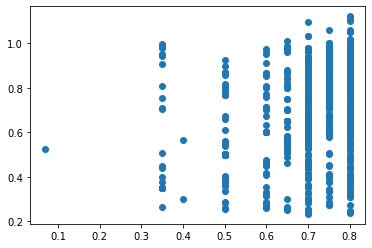

In [97]:
#Scatter plot
plt.scatter(x,y)
plt.show()

In [125]:
#divide the dataset into training and testing set
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x,y,test_size=0.2, random_state=0)

In [126]:
x.shape

(1197, 1)

In [127]:
x_train.shape

(957, 1)

In [128]:
x_test.shape

(240, 1)

In [129]:
y_train.shape

(957, 1)

In [130]:
x_test.shape

(240, 1)

In [131]:
from sklearn.linear_model import LinearRegression
lm = LinearRegression()
lm.fit(x_train,y_train)

LinearRegression()

In [132]:
y_pred = lm.predict(x_test)
y_pred

array([[0.78667051],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.64285013],
       [0.71476032],
       [0.78667051],
       [0.78667051],
       [0.71476032],
       [0.64285013],
       [0.75071541],
       [0.75071541],
       [0.57093993],
       [0.71476032],
       [0.57093993],
       [0.78667051],
       [0.75071541],
       [0.64285013],
       [0.57093993],
       [0.75071541],
       [0.71476032],
       [0.71476032],
       [0.57093993],
       [0.75071541],
       [0.57093993],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.75071541],
       [0.75071541],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.78667051],
       [0.71476032],
       [0.78667051],
       [0.78667051],
       [0.71476032],
       [0.78667051],
       [0.78667051],
       [0.71476032],
       [0.75071541],
       [0.78667051],
       [0.71476032],
       [0.786

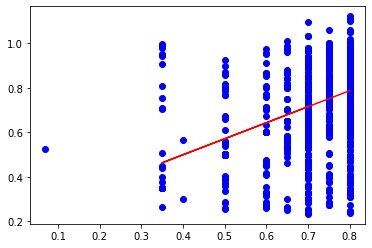

In [133]:
plt.scatter(x,y,color = 'blue')
plt.plot(x_test,y_pred,color = 'red')